In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import warnings


In [13]:
data_2021=pd.read_csv('world-happiness-report-2021.csv')
data_2022=pd.read_csv('World Happiness Report 2022.csv')
data_2023=pd.read_csv('WHR2023.csv')

In [22]:
data_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [88]:
data_2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

# To analyse World happiness data and to find the reason behind happiness of any country.

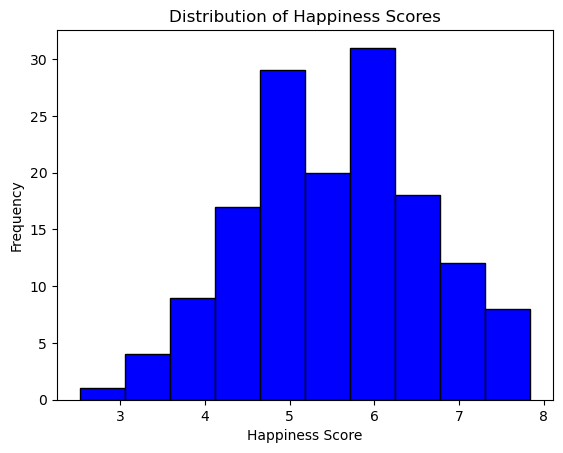

In [83]:
plt.hist(data_2021['Ladder score'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

# How different factors  effect on happiness score

In [56]:
econ_happiness = ['Ladder score','Freedom to make life choices']
econ_corr = data_2021[econ_happiness]
econ_corr.corr()

,Ladder score,Freedom to make life choices
Ladder score,1.000000,0.607753
Freedom to make life choices,0.607753,1.000000


In [57]:
econ_happiness = ['Ladder score','Logged GDP per capita']
econ_corr = data_2021[econ_happiness]
econ_corr.corr()

,Ladder score,Logged GDP per capita
Ladder score,1.00000,0.78976
Logged GDP per capita,0.78976,1.00000


In [58]:
econ_happiness = ['Ladder score','Generosity']
econ_corr = data_2021[econ_happiness]
econ_corr.corr()

,Ladder score,Generosity
Ladder score,1.000000,-0.017799
Generosity,-0.017799,1.000000


In [59]:
econ_happiness = ['Ladder score','Dystopia + residual']
econ_corr = data_2021[econ_happiness]
econ_corr.corr()

,Ladder score,Dystopia + residual
Ladder score,1.00000,0.49201
Dystopia + residual,0.49201,1.00000


In [60]:
econ_happiness = ['Ladder score','Healthy life expectancy']
econ_corr = data_2021[econ_happiness]
econ_corr.corr()

,Ladder score,Healthy life expectancy
Ladder score,1.000000,0.768099
Healthy life expectancy,0.768099,1.000000


/var/folders/gt/78z4rthd43sfrt51ccwn35kh0000gn/T/ipykernel_920/2921509230.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



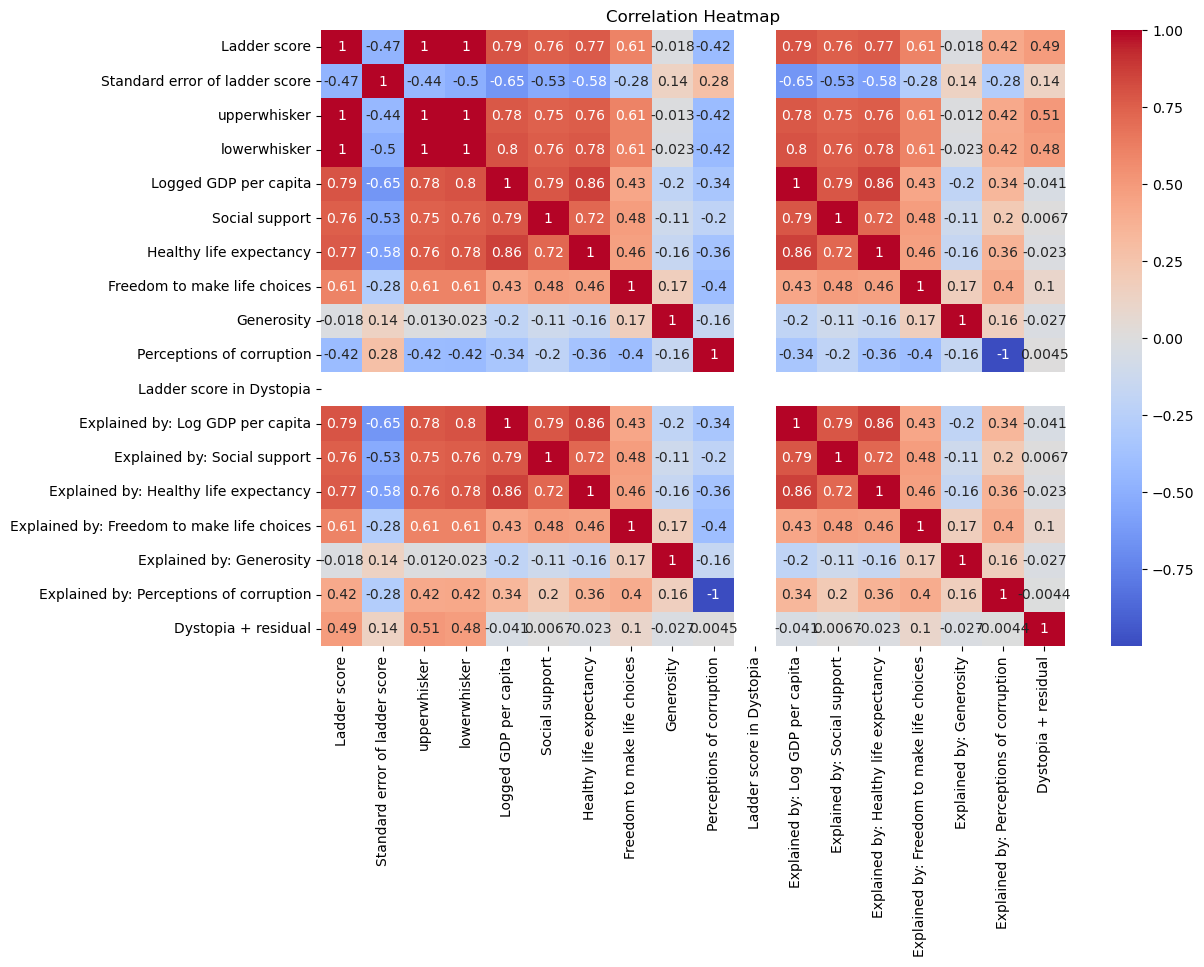

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_2021.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Some visualizations related to happiness score and other factors 

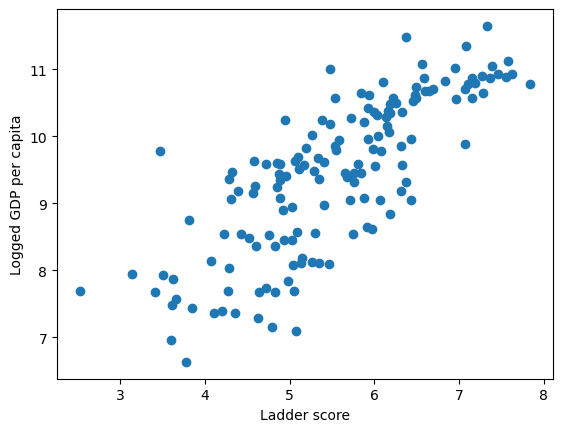

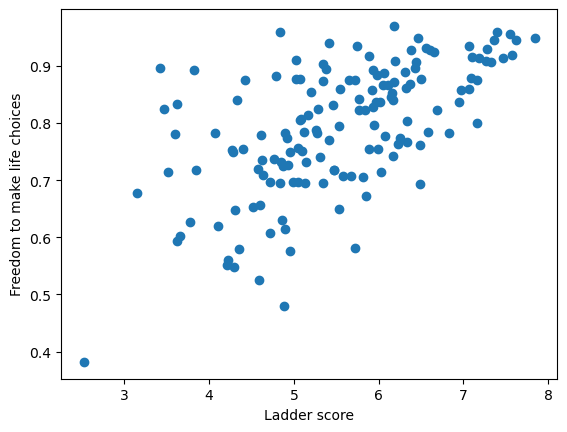

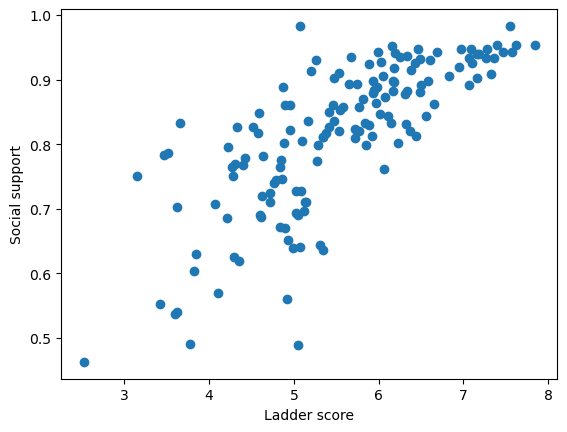

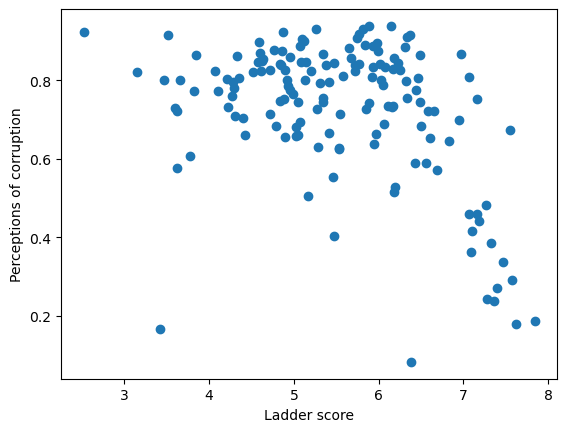

In [73]:
# Plot a scatter plot of happiness scores vs. Logged GDP per capita
plt.scatter(data_2021['Ladder score'],data_2021['Logged GDP per capita'])
plt.xlabel('Ladder score')
plt.ylabel('Logged GDP per capita')
plt.show()
# Plot a scatter plot of happiness scores vs. Freedom to make life choices
plt.scatter(data_2021['Ladder score'], data_2021['Freedom to make life choices'])
plt.xlabel('Ladder score')
plt.ylabel('Freedom to make life choices')
plt.show()
# Plot a scatter plot of happiness scores vs. Social Support
plt.scatter(data_2021['Ladder score'],data_2021['Social support'])
plt.ylabel('Social support')
plt.xlabel('Ladder score')
plt.show()
# Plot a scatter plot of happiness scores vs. Perceptions of corruption
plt.scatter(data_2021['Ladder score'],data_2021['Perceptions of corruption'])
plt.ylabel('Perceptions of corruption')
plt.xlabel('Ladder score')
plt.show()

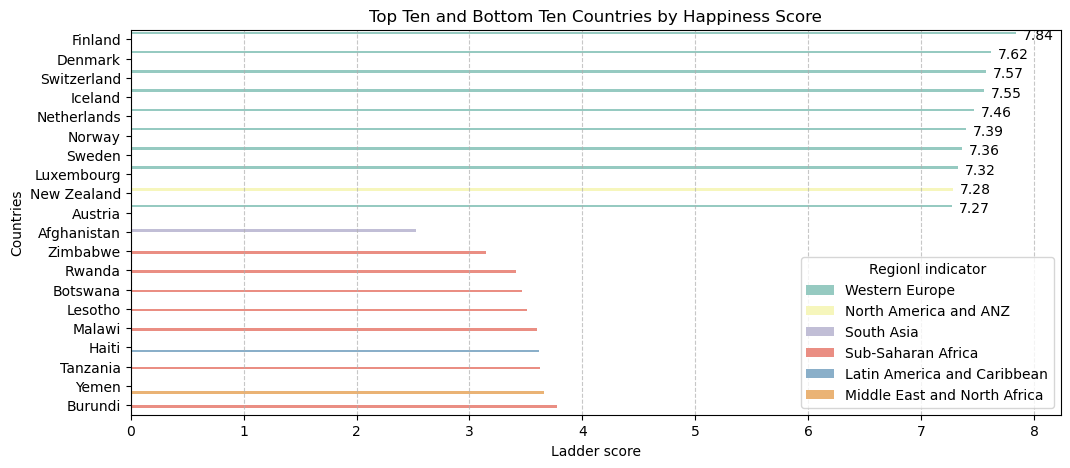

In [82]:
top_10_happiest = data_2021.sort_values(by='Ladder score', ascending=False).head(10)
bottom_10_least_happy = data_2021.sort_values(by='Ladder score').head(10)

# Combine the top and bottom dataframes for analysis
combined_df = pd.concat([top_10_happiest, bottom_10_least_happy])

# Create the plot using Seaborn
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Ladder score', y='Country name', hue='Regional indicator', data=combined_df, palette='Set3')
plt.xlabel('Ladder score')
plt.ylabel('Countries')
plt.title('Top Ten and Bottom Ten Countries by Happiness Score')
plt.legend(title='Regionl indicator')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels with the Happiness Score values
for index, row in combined_df.iterrows():
    ax.annotate(f"{row['Ladder score']:.2f}", (row['Ladder score'], index), xytext=(5, 0), textcoords='offset points')

#     plt.text(row['Ladder score'], row.name, f"{row['Ladder score']:.2f}", va='center')

plt.show()

# Happiest and Unhappiest Countries in 2021,2022,2023

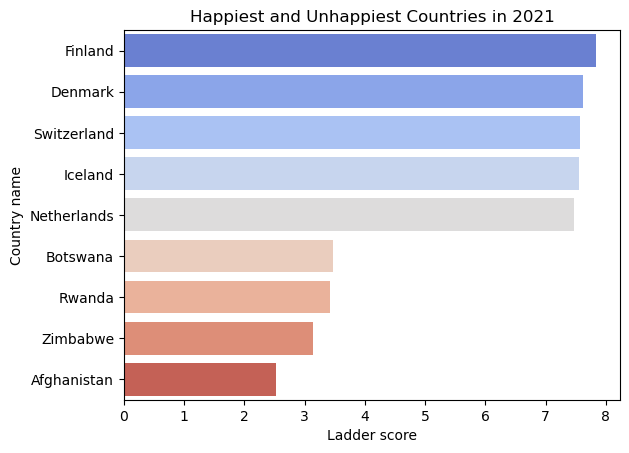

In [12]:
data_2021_happiest_unhappiest = data_2021[(data_2021.loc[:, "Ladder score"] > 7.4) | (data_2021.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=data_2021_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()
    

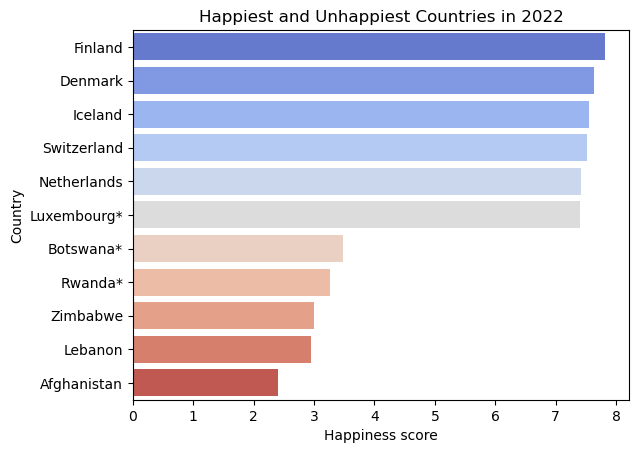

In [19]:
data_2022_happiest_unhappiest = data_2022[(data_2022.loc[:, "Happiness score"] > 7.4) | (data_2022.loc[:, "Happiness score"] < 3.5)]
sns.barplot(x = "Happiness score", y = "Country", data=data_2022_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2022")
plt.show()
    

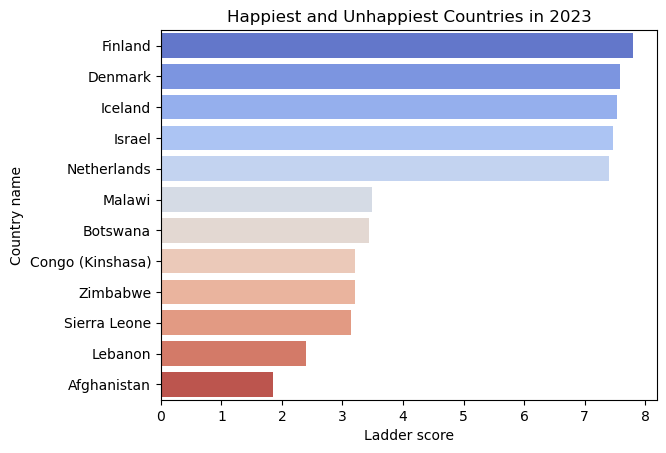

In [21]:
data_2023_happiest_unhappiest = data_2023[(data_2023.loc[:, "Ladder score"] > 7.4) | (data_2023.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=data_2023_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2023")
plt.show()
    

# Relationship Between Happiness and Income

In [55]:
fig = px.scatter(data_2021, 
                 x = "Logged GDP per capita",
                 y = "Ladder score",
                 animation_group = "Country name",
                 template = "plotly_white",
                 color = "Regional indicator", 
                 hover_name = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Relationship Between Happiness and Income")
fig.show()

# Relationship Between Happiness and Freedom

In [31]:
fig = px.scatter(data_2021, 
                 x = "Freedom to make life choices",
                 y = "Ladder score",
                 animation_group = "Country name",
                 color = "Regional indicator", 
                 hover_name = "Country name", 
                 size_max = 60)
fig.update_layout(title = "Relationship Between Happiness and Freedom")
fig.show()

# Relationship Between Happiness and Corruption

In [72]:
fig = px.scatter(data_2021, 
                 x = "Perceptions of corruption",
                 y = "Ladder score",
                 animation_group = "Country name",
                 color = "Regional indicator", 
                 hover_name = "Country name", 
                 size_max = 80)
fig.update_layout(title = "Relationship Between Happiness and Corruption")
fig.show()

# Ladder Score Distribution by Regional Indicator

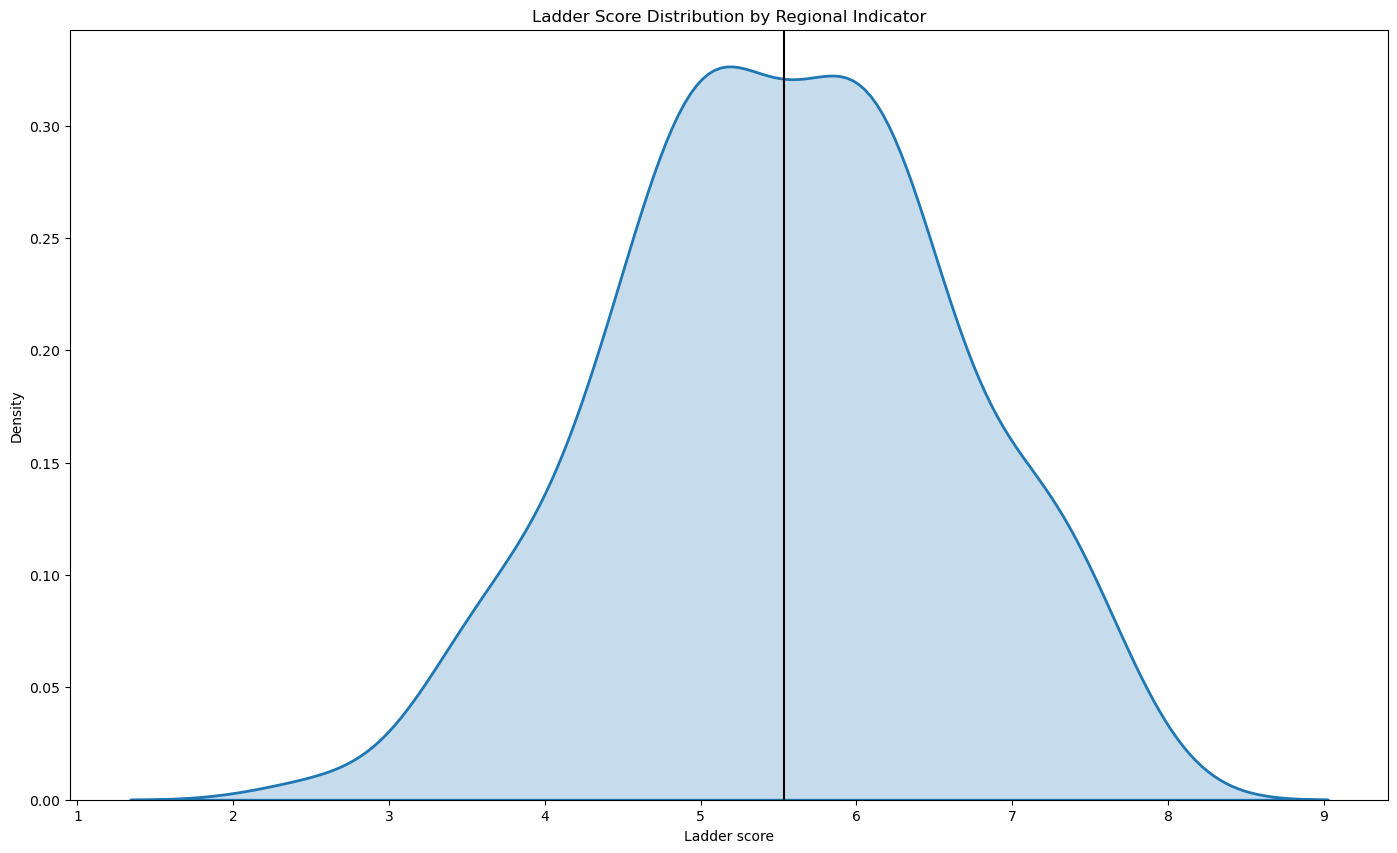

In [35]:
plt.figure(figsize = (17,10))
sns.kdeplot(data_2021["Ladder score"], fill = True, linewidth = 2)
plt.axvline(data_2021["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

# Ladder Score Distribution by Countries in Map View

In [81]:
fig = px.choropleth(data_2021.sort_values("Country name"),
                    locations = "Country name",
                    locationmode = "country names",
                    color = "Ladder score")
fig.update_layout(title = "Ladder Score Distribution by Countries in Map View")
fig.show()

# Most Generous and Most Ungenerous Countries in 2021

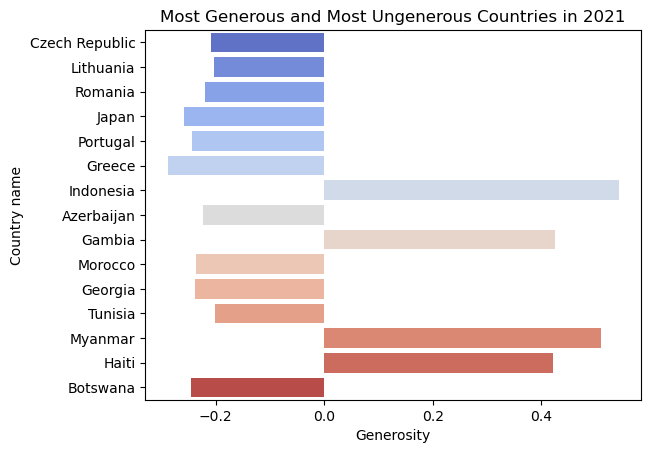

In [38]:
data_2021_g = data_2021[(data_2021.loc[:, "Generosity"] > 0.4) | (data_2021.loc[:, "Generosity"] < -0.2)]
sns.barplot(x = "Generosity", y = "Country name", data = data_2021_g, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2021")
plt.show()



# Relationship Between Features

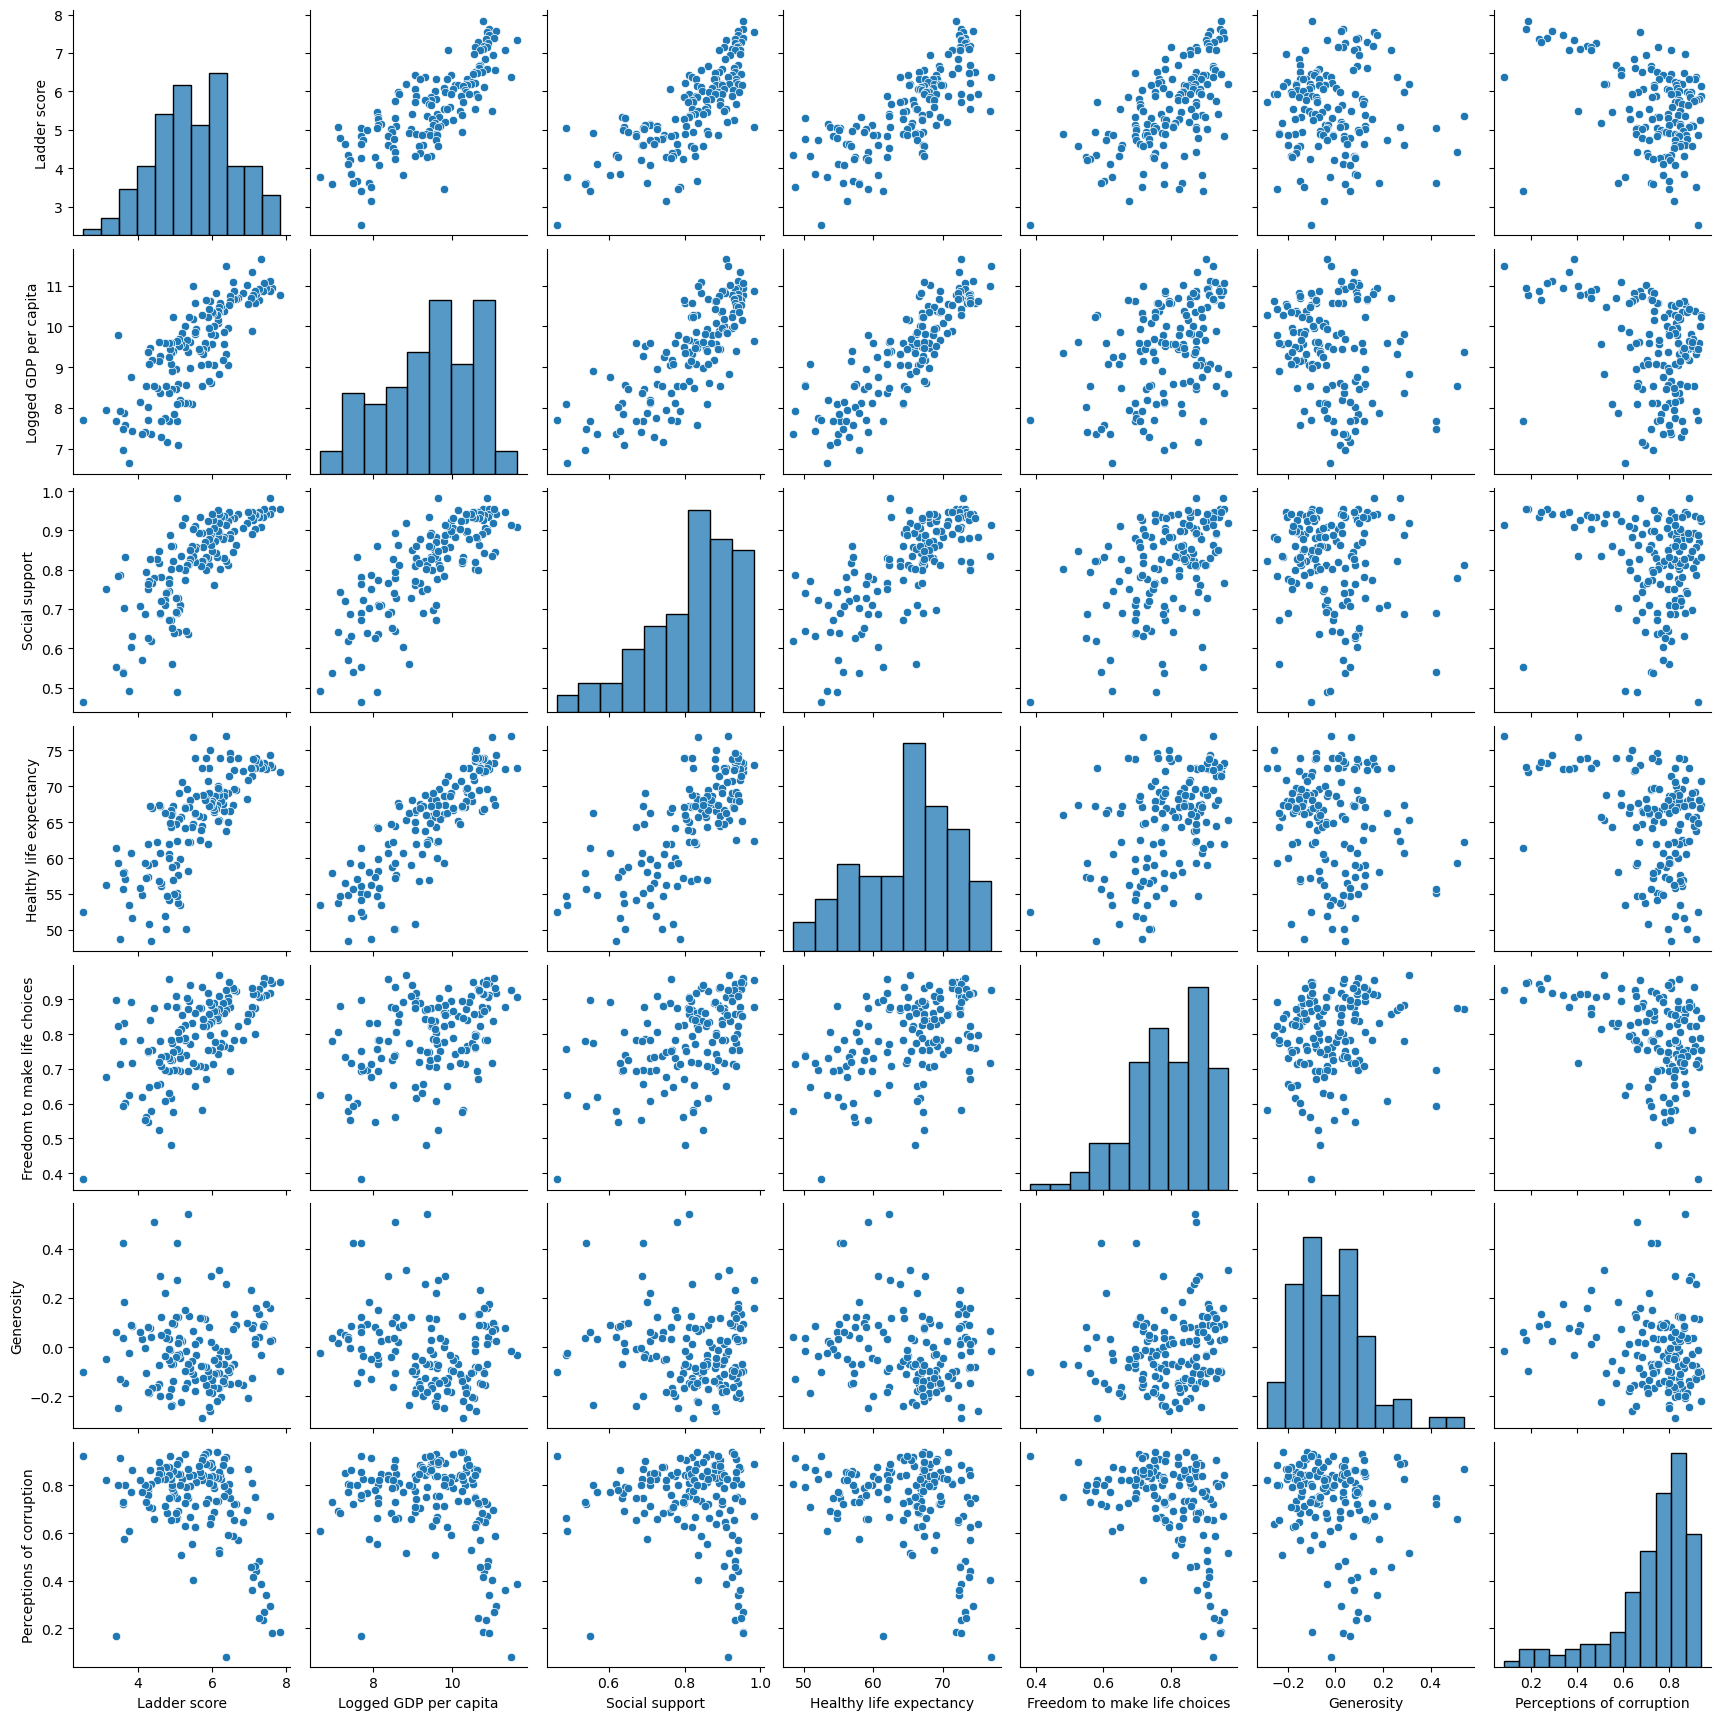

In [91]:
selected_features = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
sns.pairplot(data_2021[selected_features])
plt.show()

# Conclusion

In this analysis of the World Happiness Report dataset for the year 2021

we investigated the connections between various variables and their effect on hapiness scores.

A few vital discoveries and bits of knowledge rose up out of our analysis:

Income and Happiness: There is a positive correlation between income (Logged GDP per capita) and happiness scores (Ladder score).

Freedom and Happiness: Countries where individuals have greater freedom tend to report higher levels of happiness.

Corruption and Happiness: Perceptions of corruption are inversly related with happiness scores. Countries with lower levels of corruption tend to have higher happiness scores.

Generosity and Happiness: Generosity alone does not appear to have a strong impact on happiness scores, because the relation between them is too weak.

This comprehensive analysis of World Happiness data provided valuable insights into the factors influencing happiness across countries. It highlighted the importance of economic prosperity, social support, freedom, and low corruption levels in fostering happiness. The visualizations and rankings offered a clear picture of happiness trends.
